In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import PowerTransformer

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.pandas.set_option('display.max_columns', None)


In [2]:
project_path = r'C:\Users\kchanas\Documents\Learning\Kaggle\House_Prices'

In [3]:
train = pd.read_csv(os.path.join(project_path, r'data\train.csv')).set_index('Id')

In [4]:
train.head()
train.shape
train.info()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


(1460, 80)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

The house price dataset contains 1460 rows, i.e., houses, and 80 columns, i.e., variables. After reading description of variables we can add some more of them:

In [5]:
train['GrLivAndBsmtArea'] = train['TotalBsmtSF'] + train['GrLivArea']

**We will analyse the dataset to identify:**

1. Missing values
2. Numerical variables
3. Distribution of the numerical variables
4. Discrete variables
5. Year variables
6. Categorical variables
7. Cardinality of the categorical variables
8. Outliers
9. Potential relationship between the variables and the target: SalePrice

In [6]:
vars_with_na = [col for col in train.columns if train[col].isnull().sum() > 0]
train[vars_with_na].isnull().mean().sort_values(ascending=False)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageYrBlt     0.055479
GarageType      0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
dtype: float64

Four variables have over 80% of missing values, so in the further steps of machine learning pipeline I will drop them.

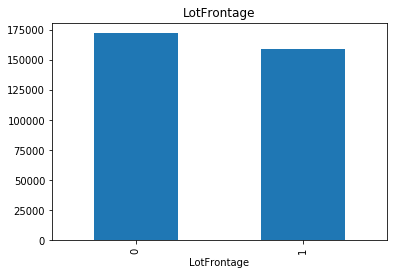

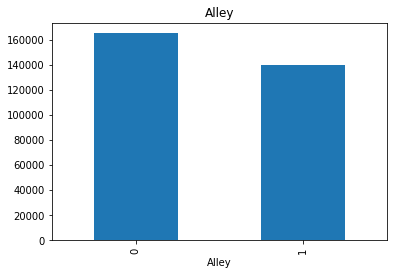

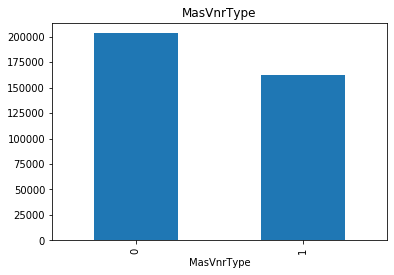

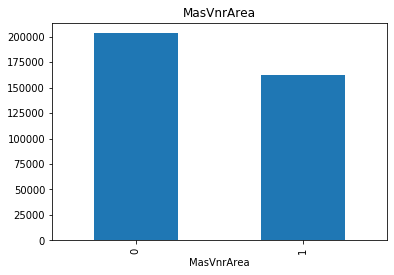

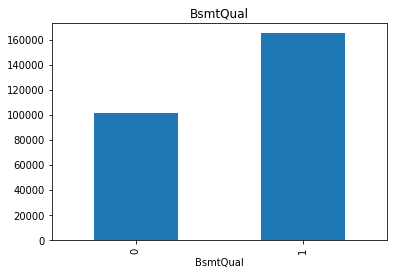

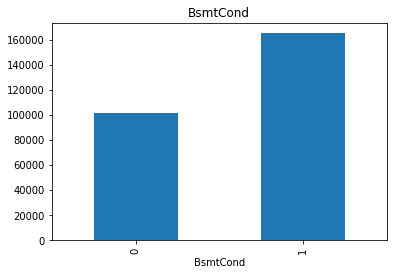

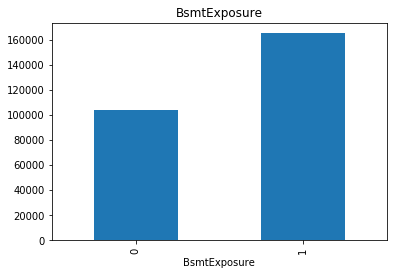

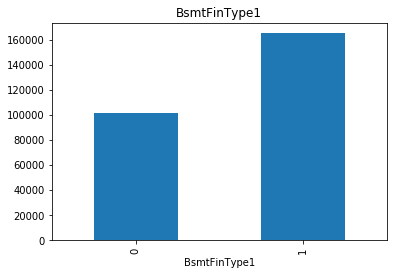

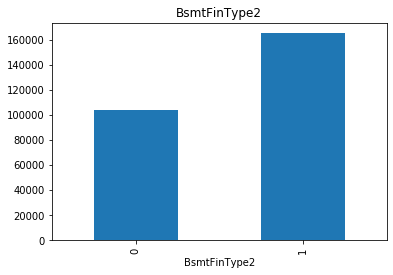

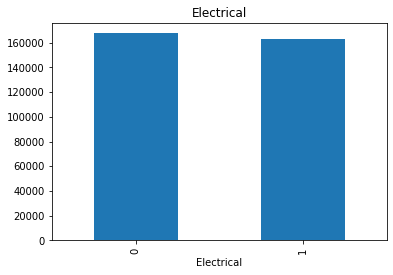

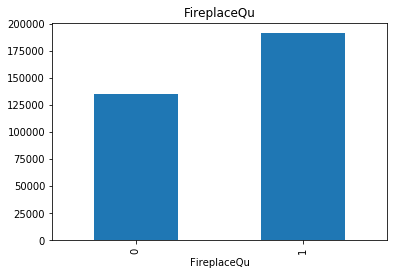

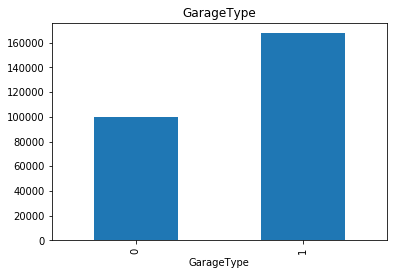

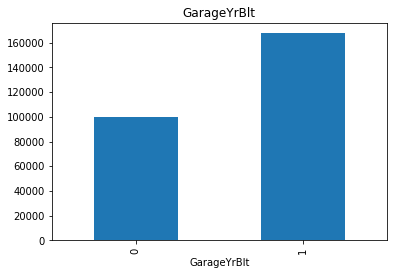

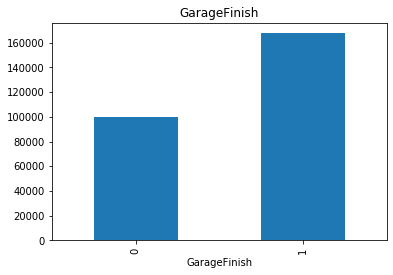

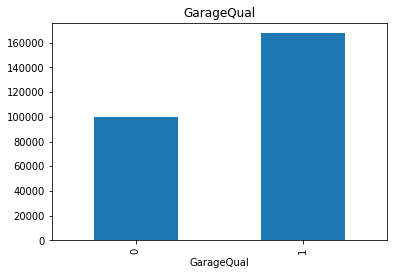

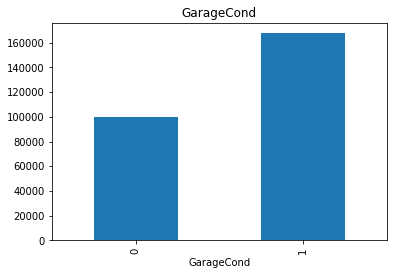

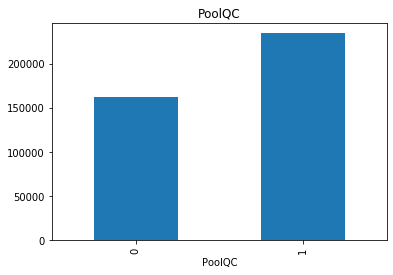

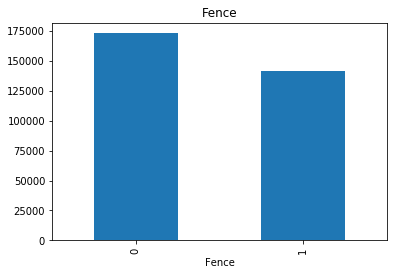

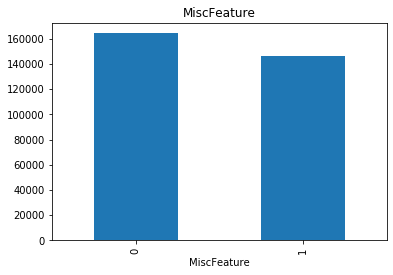

In [7]:
def analyze_na_values(df, var):
    df = df.copy()
    df[var] = np.where(df[var].isnull(), 0, 1)
    
    df.groupby(var)['SalePrice'].median().plot.bar()
    plt.title(var)
    plt.show()

for var in train[vars_with_na].columns:
    analyze_na_values(train, var)

In most cases the average SalePrice differs between observations with missing information and the ones where information exists

Let's look at the relationship between variables with information about lot, fireplaces, garages, basements to see if there are reasons why values are missing.

In [8]:
pd.pivot_table(train, index='Fireplaces', columns='FireplaceQu', aggfunc='count', values='SalePrice')

FireplaceQu,Ex,Fa,Gd,Po,TA
Fireplaces,,,,,
1,19.0,28.0,324.0,20.0,259.0
2,4.0,4.0,54.0,NaN,53.0
3,1.0,1.0,2.0,NaN,1.0


## Types of variables

In [9]:
num_vars = [var for var in train.columns if train[var].dtypes != 'O']

year_vars = [var for var in num_vars if 'Year' in var or 'Yr' in var]
num_vars = [var for var in num_vars if var not in year_vars]
discrete_vars = [var for var in num_vars if train[var].nunique() <= 20]
num_vars = [var for var in num_vars if var not in discrete_vars]

print('Numeric variables: ', num_vars)
print('Discrete variables: ', discrete_vars)
print('Year variables: ', year_vars)

Numeric variables:  ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'MiscVal', 'SalePrice', 'GrLivAndBsmtArea']
Discrete variables:  ['MSSubClass', 'OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MoSold']
Year variables:  ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']


## Numerical variables

Text(0.5, 0, 'LotFrontage')

Text(0, 0.5, 'Number of houses')

Text(0.5, 1.0, 'LotFrontage')

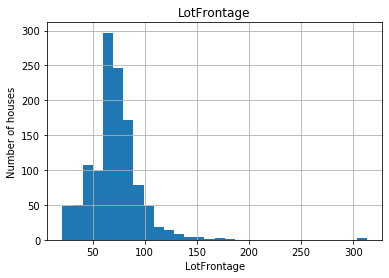

Text(0.5, 0, 'LotArea')

Text(0, 0.5, 'Number of houses')

Text(0.5, 1.0, 'LotArea')

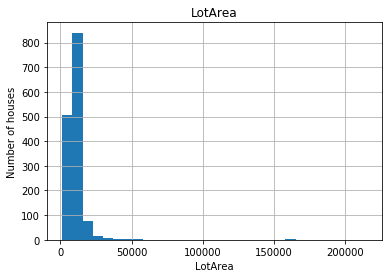

Text(0.5, 0, 'MasVnrArea')

Text(0, 0.5, 'Number of houses')

Text(0.5, 1.0, 'MasVnrArea')

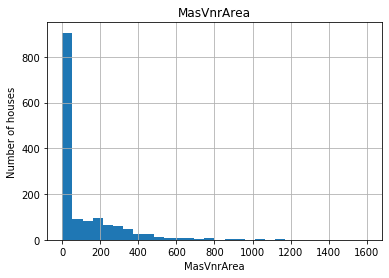

Text(0.5, 0, 'BsmtFinSF1')

Text(0, 0.5, 'Number of houses')

Text(0.5, 1.0, 'BsmtFinSF1')

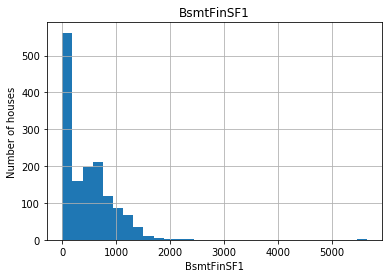

Text(0.5, 0, 'BsmtFinSF2')

Text(0, 0.5, 'Number of houses')

Text(0.5, 1.0, 'BsmtFinSF2')

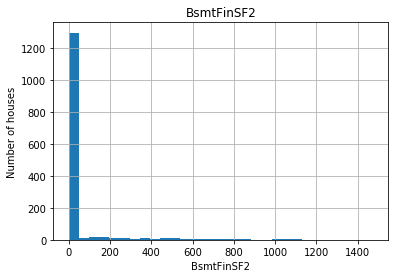

Text(0.5, 0, 'BsmtUnfSF')

Text(0, 0.5, 'Number of houses')

Text(0.5, 1.0, 'BsmtUnfSF')

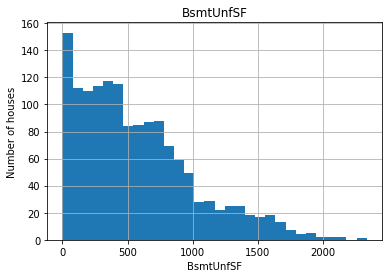

Text(0.5, 0, 'TotalBsmtSF')

Text(0, 0.5, 'Number of houses')

Text(0.5, 1.0, 'TotalBsmtSF')

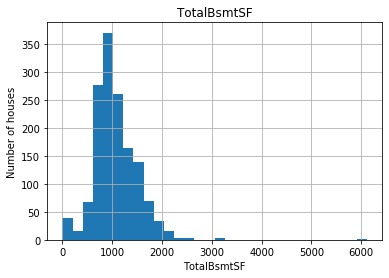

Text(0.5, 0, '1stFlrSF')

Text(0, 0.5, 'Number of houses')

Text(0.5, 1.0, '1stFlrSF')

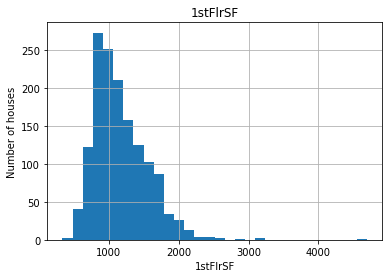

Text(0.5, 0, '2ndFlrSF')

Text(0, 0.5, 'Number of houses')

Text(0.5, 1.0, '2ndFlrSF')

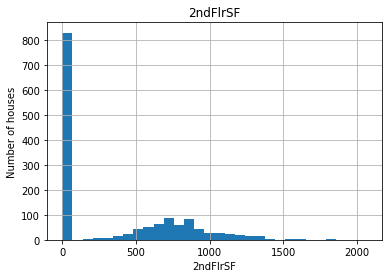

Text(0.5, 0, 'LowQualFinSF')

Text(0, 0.5, 'Number of houses')

Text(0.5, 1.0, 'LowQualFinSF')

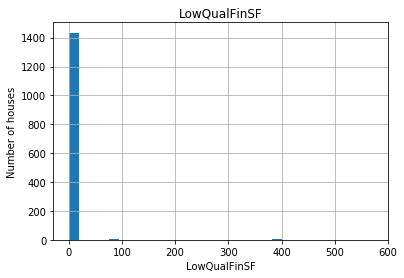

Text(0.5, 0, 'GrLivArea')

Text(0, 0.5, 'Number of houses')

Text(0.5, 1.0, 'GrLivArea')

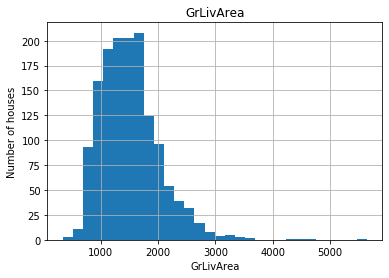

Text(0.5, 0, 'GarageArea')

Text(0, 0.5, 'Number of houses')

Text(0.5, 1.0, 'GarageArea')

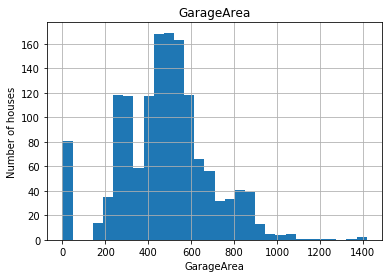

Text(0.5, 0, 'WoodDeckSF')

Text(0, 0.5, 'Number of houses')

Text(0.5, 1.0, 'WoodDeckSF')

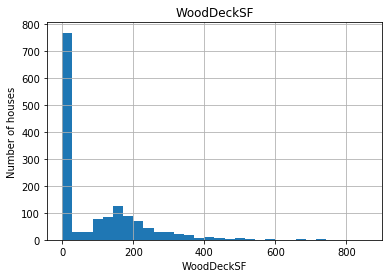

Text(0.5, 0, 'OpenPorchSF')

Text(0, 0.5, 'Number of houses')

Text(0.5, 1.0, 'OpenPorchSF')

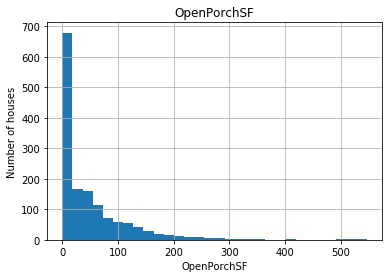

Text(0.5, 0, 'EnclosedPorch')

Text(0, 0.5, 'Number of houses')

Text(0.5, 1.0, 'EnclosedPorch')

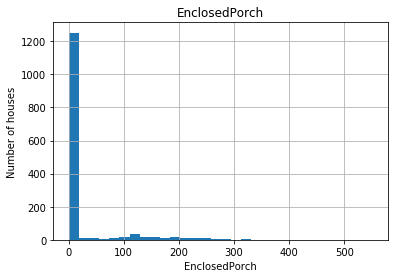

Text(0.5, 0, 'ScreenPorch')

Text(0, 0.5, 'Number of houses')

Text(0.5, 1.0, 'ScreenPorch')

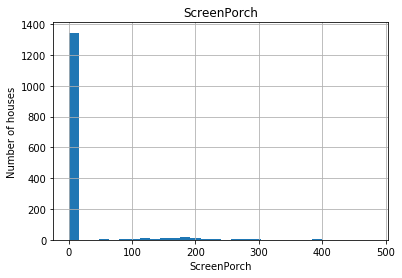

Text(0.5, 0, 'MiscVal')

Text(0, 0.5, 'Number of houses')

Text(0.5, 1.0, 'MiscVal')

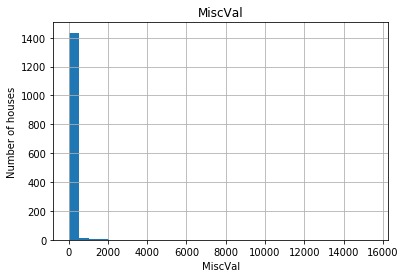

Text(0.5, 0, 'SalePrice')

Text(0, 0.5, 'Number of houses')

Text(0.5, 1.0, 'SalePrice')

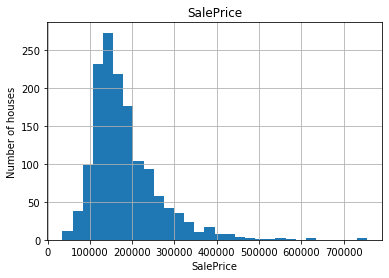

Text(0.5, 0, 'GrLivAndBsmtArea')

Text(0, 0.5, 'Number of houses')

Text(0.5, 1.0, 'GrLivAndBsmtArea')

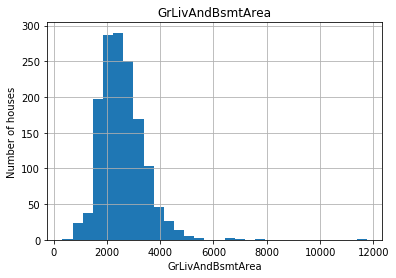

In [10]:
for var in num_vars:
    train[var].hist(bins=30)
    plt.xlabel(var)
    plt.ylabel('Number of houses')
    plt.title(var)
    plt.show()
    

The distribution of most numerical variables is not normal, so in the next step I will how PowerTransformer works with these variables.

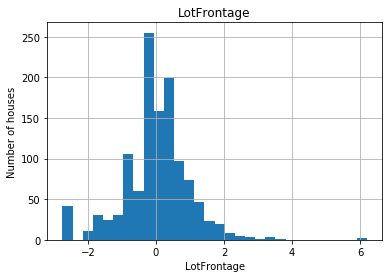

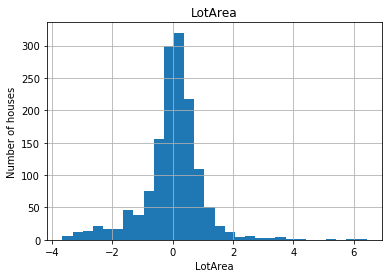

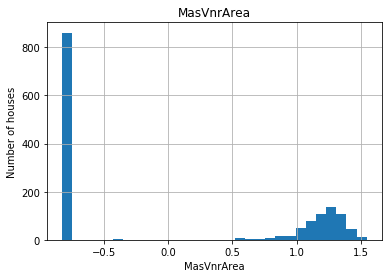

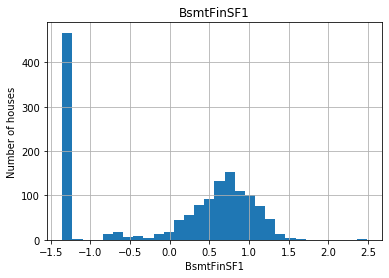

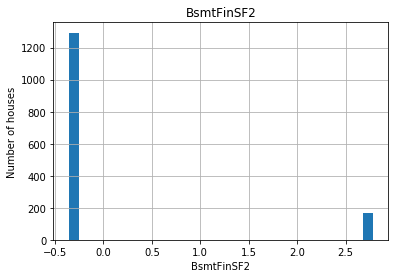

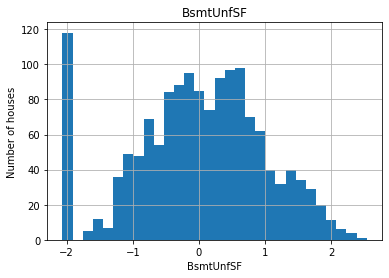

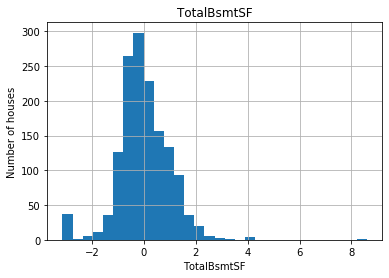

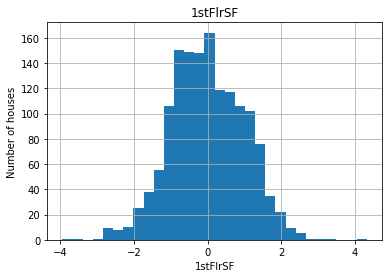

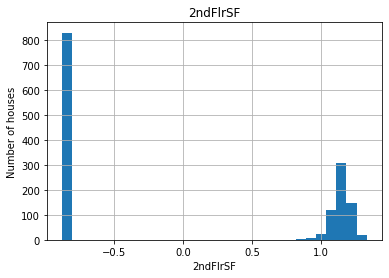

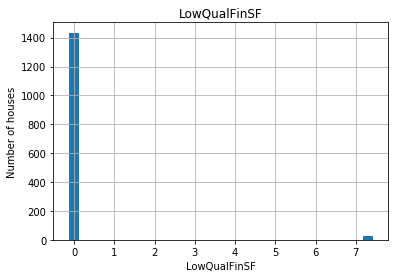

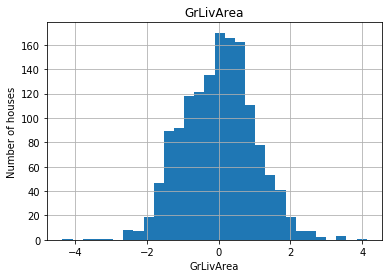

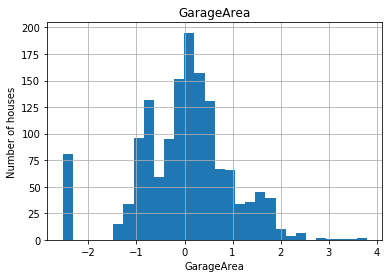

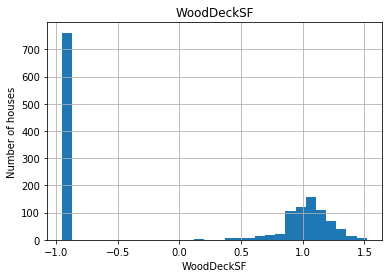

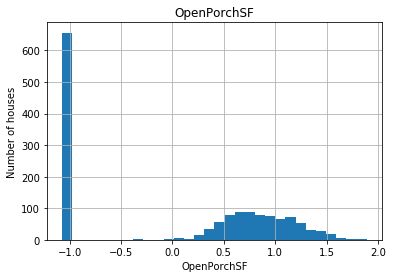

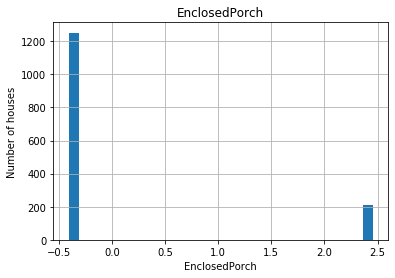

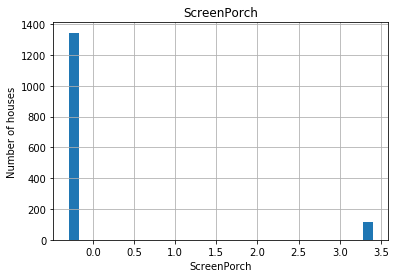

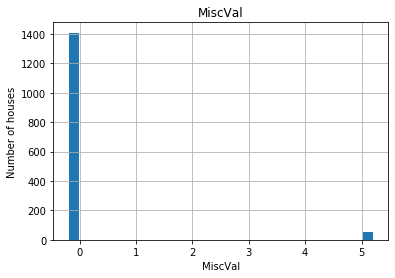

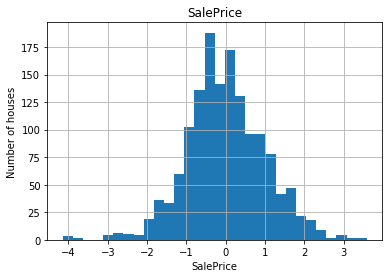

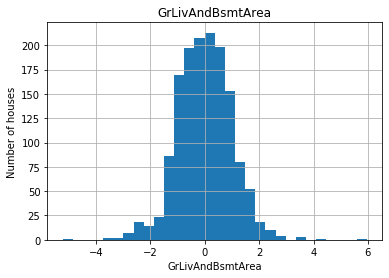

In [11]:
def num_vars_transformed(df, num_vars):
    df = df.copy()
    pt = PowerTransformer()
    df_trans = pd.DataFrame(pt.fit_transform(df[num_vars]), columns=num_vars)
    for var in num_vars:
        df_trans[var].hist(bins=30)
        plt.xlabel(var)
        plt.ylabel('Number of houses')
        plt.title(var)
        plt.show()
        
num_vars_transformed(train, num_vars)

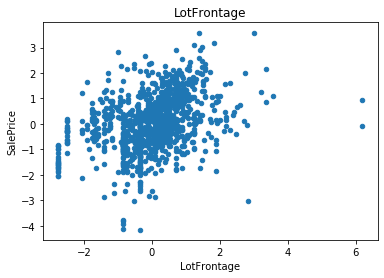

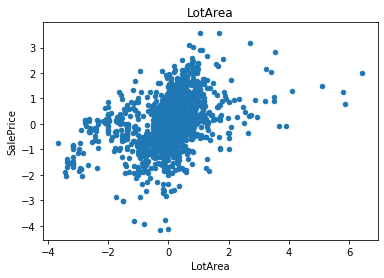

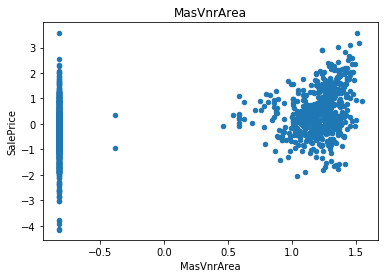

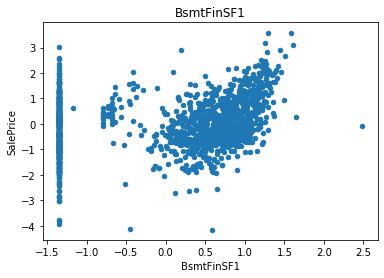

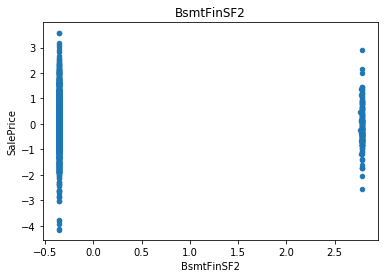

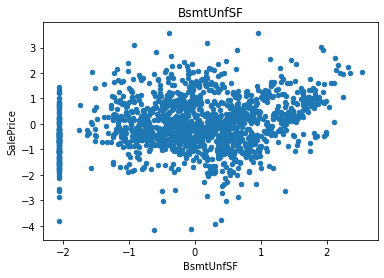

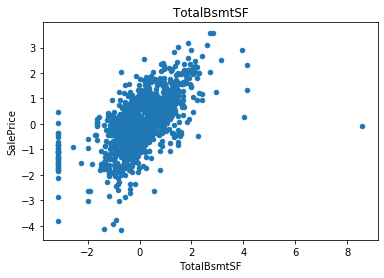

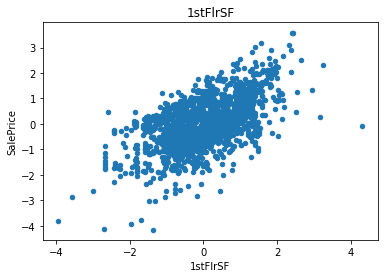

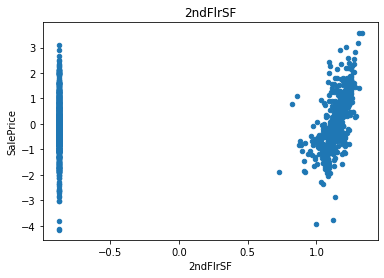

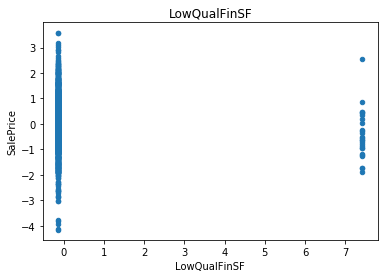

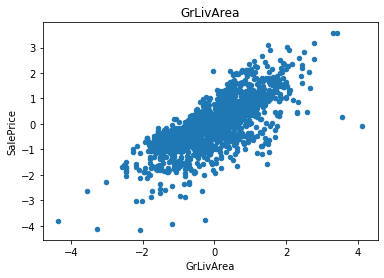

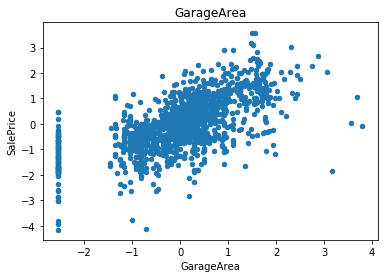

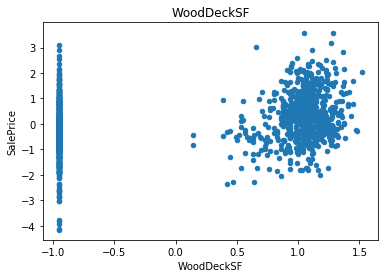

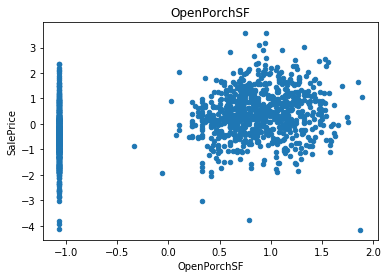

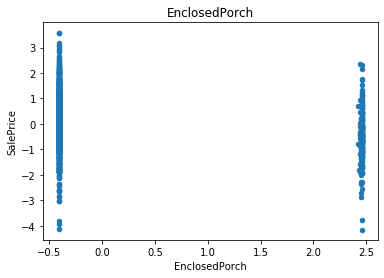

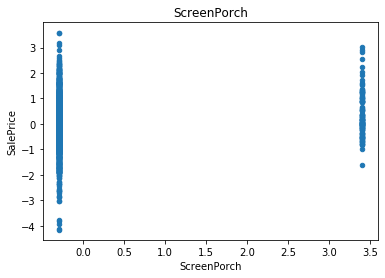

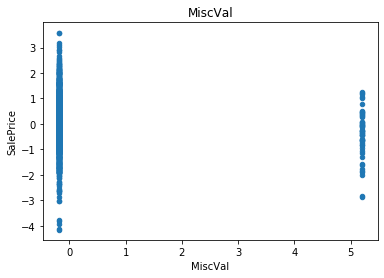

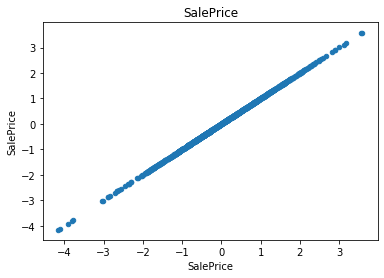

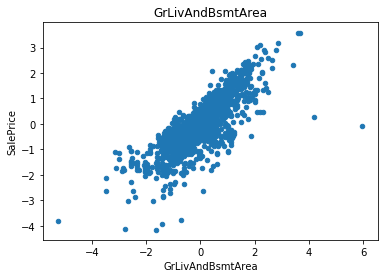

In [12]:
def analyze_num_relation_with_target(df, num_vars):
    df = df.copy()
    pt = PowerTransformer()
    df_trans = pd.DataFrame(pt.fit_transform(df[num_vars]), columns=num_vars)
    for var in num_vars:
        df_trans.plot.scatter(x=var, y='SalePrice')
        plt.xlabel(var)
        plt.ylabel('SalePrice')
        plt.title(var)
        plt.show()
        
analyze_num_relation_with_target(train, num_vars)

It seems that several variables have strong relation with Sale Price, for example 1stFlrSF, GrLivArea, GarageArea.

## Discrete variables

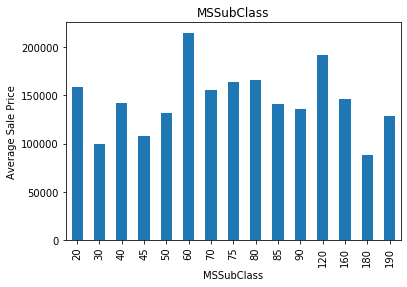

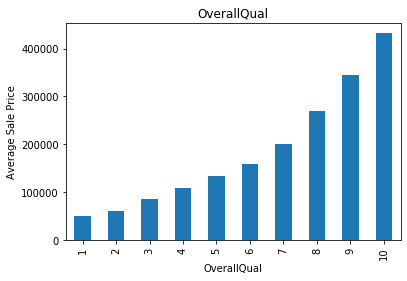

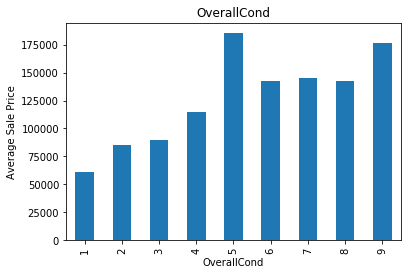

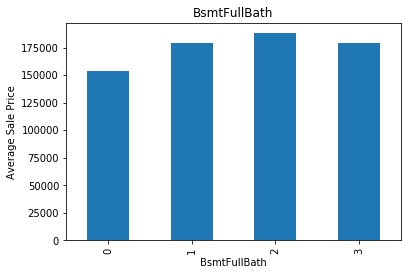

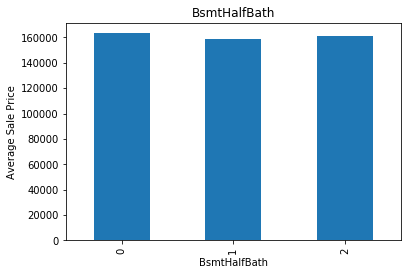

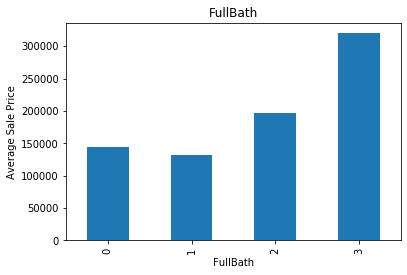

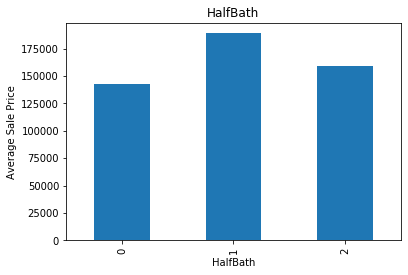

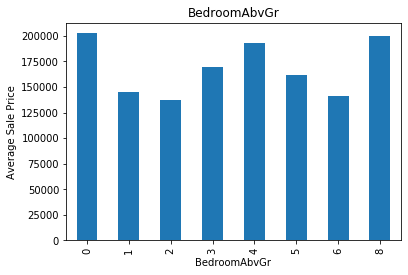

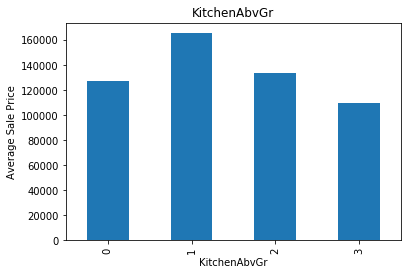

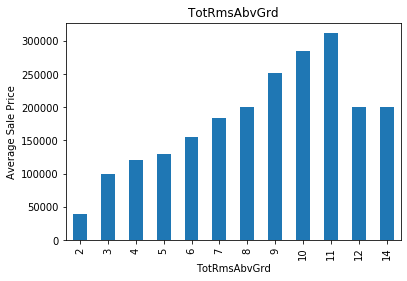

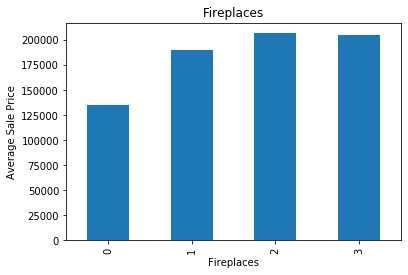

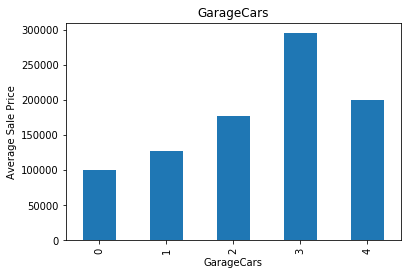

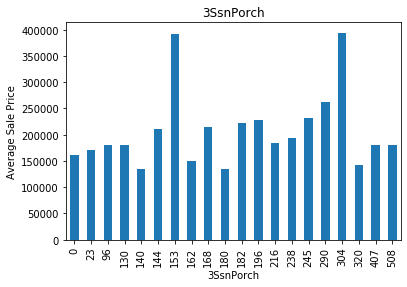

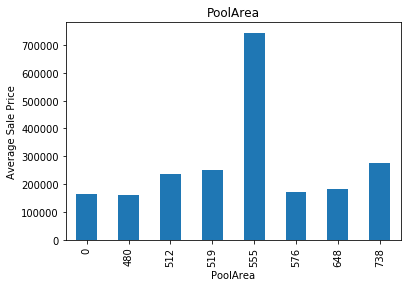

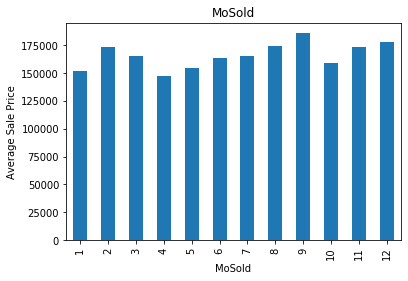

In [13]:
def analyze_discrete_relation_with_target(df, var):
    df = df.copy()
    df.groupby(var)['SalePrice'].median().plot.bar()
    plt.xlabel(var)
    plt.ylabel('Average Sale Price')
    plt.title(var)
    plt.show()
    
for var in discrete_vars:
    analyze_discrete_relation_with_target(train, var)

Some of the variables can be good candidates for predictors of Sale Price, as they have strong monotonic relationship with this target. For example, for OverallQual, there is a monotonic relationship: the higher the quality, the higher the SalePrice.

The other ones like OverallCond, FullBath, GarageCars have monotonic relationship with Sale Price, but only in the part of their distribution (for OverallCond the monotonic relationship is only up to grade 5, for higher values there is no monotonic relationship).

The variable MsSubClass (this variable identifies the type of dwelling involved in the sale) can also be a good predictor as the average Sale Price differs quite strongly between different types of dweelings, however this variable should be rather treated as categorical variable, not the discrete one.

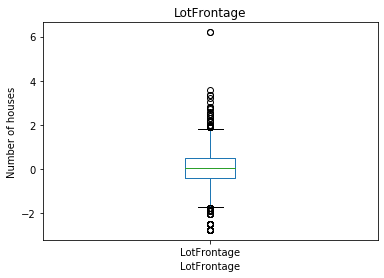

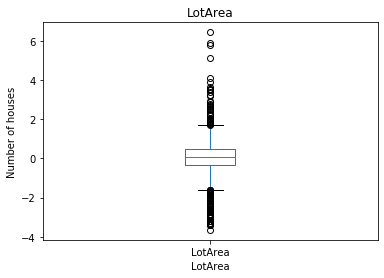

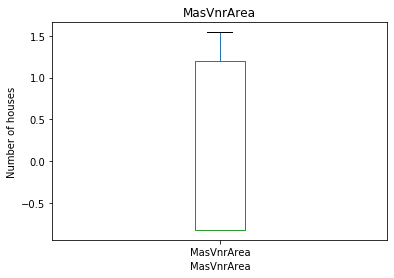

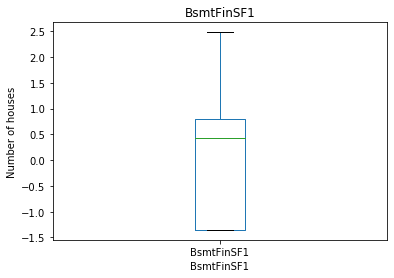

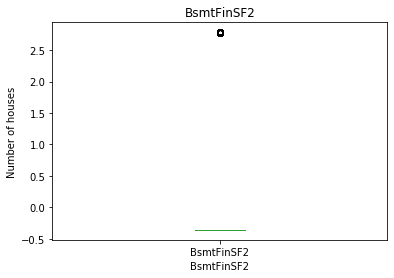

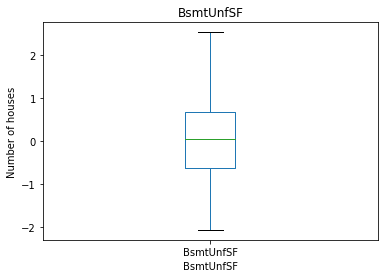

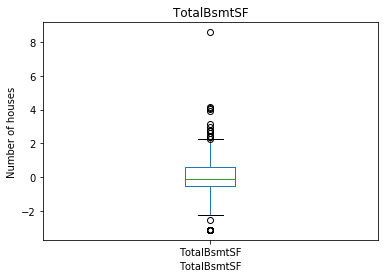

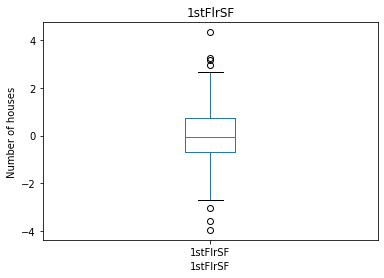

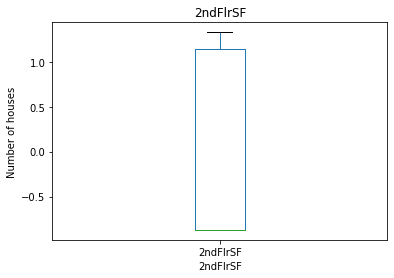

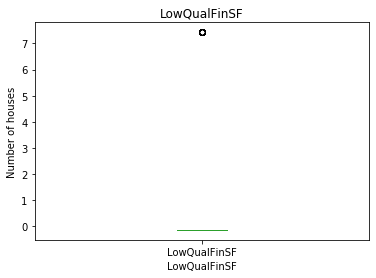

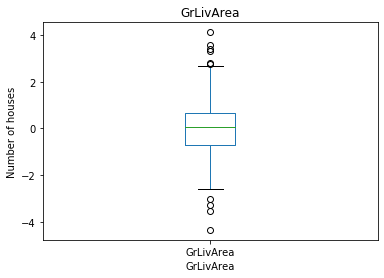

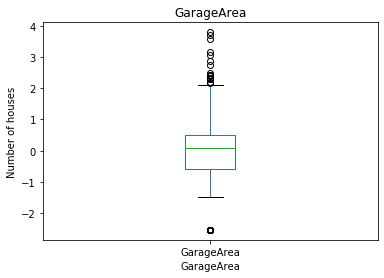

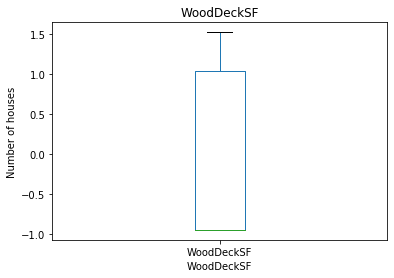

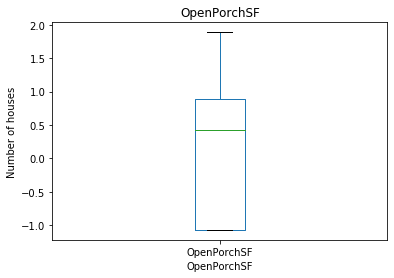

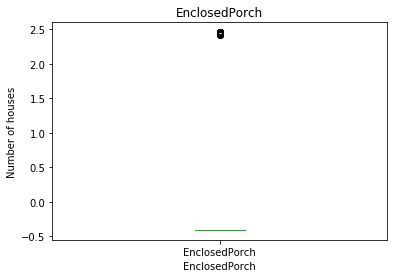

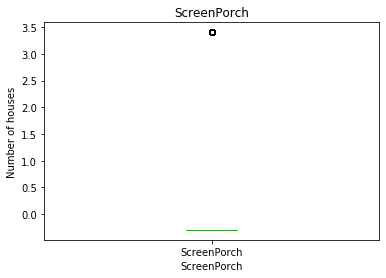

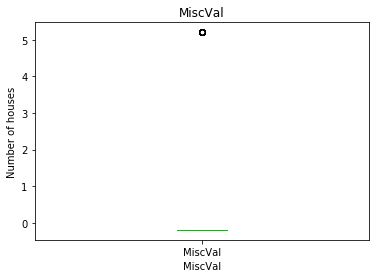

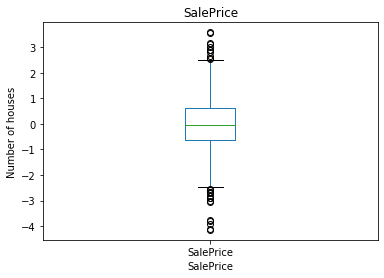

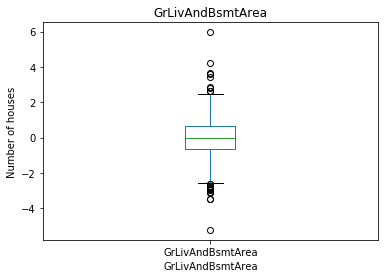

In [14]:
def find_outliers(df, num_vars):
    df = df.copy()
    pt = PowerTransformer()
    df_trans = pd.DataFrame(pt.fit_transform(df[num_vars]), columns=num_vars)
    for var in num_vars:
        df_trans[var].plot(kind='box')
        plt.xlabel(var)
        plt.ylabel('Number of houses')
        plt.title(var)
        plt.show()
        
find_outliers(train, num_vars)

After using PowerTransformer I can still find outliers in the data.

## Temporal variables

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

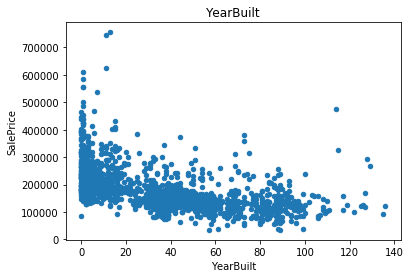

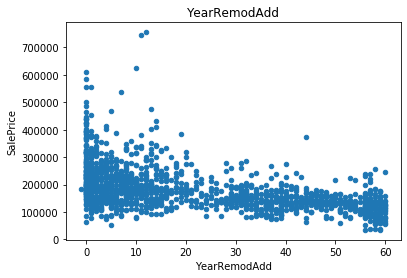

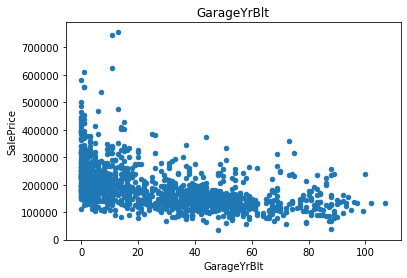

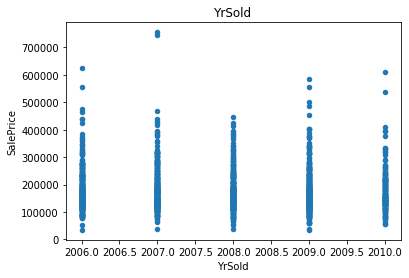

In [15]:
year_vars

def analyze_year_vars(df, year_vars):
    df = df.copy()
    for var in year_vars:
        if var != 'YrSold':
            df[var] = df['YrSold'] - df[var]
        df.plot.scatter(x=var, y='SalePrice')
        plt.xlabel(var)
        plt.ylabel('SalePrice')
        plt.title(var)
        plt.show()

analyze_year_vars(train, year_vars)

I can see quite strong relationship between temporal variables and SalePrice.

## Categorical variables

In [16]:
cat_vars = [var for var in train.columns if train[var].dtypes == 'O']
print(cat_vars)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


Variables cardinality:

In [17]:
for var in cat_vars:
    print(var + ': ', train[var].nunique())

MSZoning:  5
Street:  2
Alley:  2
LotShape:  4
LandContour:  4
Utilities:  2
LotConfig:  5
LandSlope:  3
Neighborhood:  25
Condition1:  9
Condition2:  8
BldgType:  5
HouseStyle:  8
RoofStyle:  6
RoofMatl:  8
Exterior1st:  15
Exterior2nd:  16
MasVnrType:  4
ExterQual:  4
ExterCond:  5
Foundation:  6
BsmtQual:  4
BsmtCond:  4
BsmtExposure:  4
BsmtFinType1:  6
BsmtFinType2:  6
Heating:  6
HeatingQC:  5
CentralAir:  2
Electrical:  5
KitchenQual:  4
Functional:  7
FireplaceQu:  5
GarageType:  6
GarageFinish:  3
GarageQual:  5
GarageCond:  5
PavedDrive:  3
PoolQC:  3
Fence:  4
MiscFeature:  4
SaleType:  9
SaleCondition:  6


Let's analyze the existence of rare labels among the observations:

In [18]:
def analyze_rare_labels(df, var, rare_perc):
    df = df.copy()
    tmp = df.groupby(var)['SalePrice'].count() /df.shape[0]
    return tmp[tmp <= rare_perc]

for var in cat_vars:
    print(analyze_rare_labels(train, var, 0.01))
    print(' ')

MSZoning
C (all)    0.006849
Name: SalePrice, dtype: float64
 
Street
Grvl    0.00411
Name: SalePrice, dtype: float64
 
Series([], Name: SalePrice, dtype: float64)
 
LotShape
IR3    0.006849
Name: SalePrice, dtype: float64
 
Series([], Name: SalePrice, dtype: float64)
 
Utilities
NoSeWa    0.000685
Name: SalePrice, dtype: float64
 
LotConfig
FR3    0.00274
Name: SalePrice, dtype: float64
 
LandSlope
Sev    0.008904
Name: SalePrice, dtype: float64
 
Neighborhood
Blueste    0.001370
NPkVill    0.006164
Veenker    0.007534
Name: SalePrice, dtype: float64
 
Condition1
PosA    0.005479
RRAe    0.007534
RRNe    0.001370
RRNn    0.003425
Name: SalePrice, dtype: float64
 
Condition2
Artery    0.001370
Feedr     0.004110
PosA      0.000685
PosN      0.001370
RRAe      0.000685
RRAn      0.000685
RRNn      0.001370
Name: SalePrice, dtype: float64
 
Series([], Name: SalePrice, dtype: float64)
 
HouseStyle
1.5Unf    0.009589
2.5Fin    0.005479
2.5Unf    0.007534
Name: SalePrice, dtype: float64
 
R

Some of the categorical variables show a few labels that are present in less than 1% of the observations. 

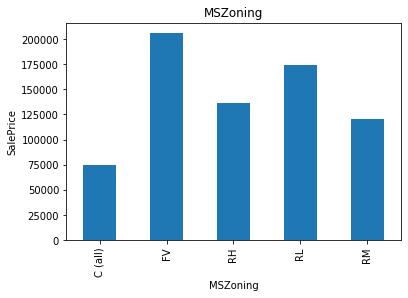

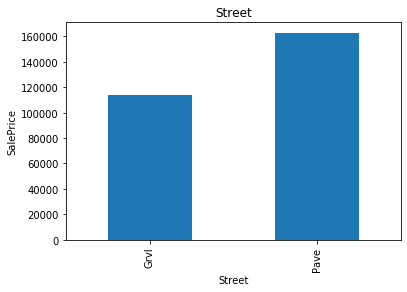

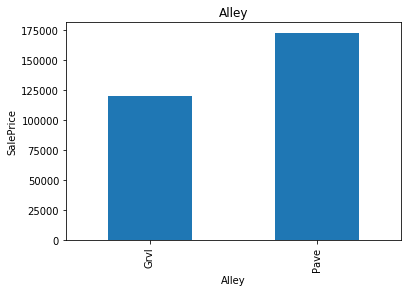

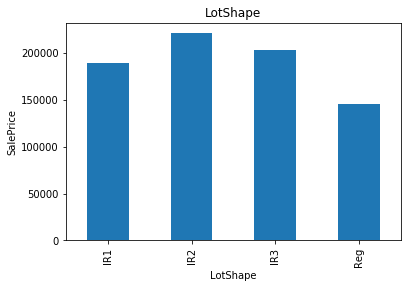

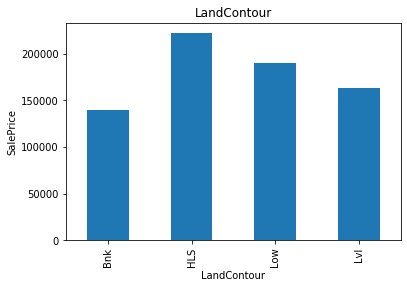

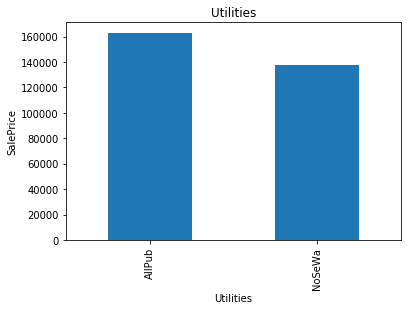

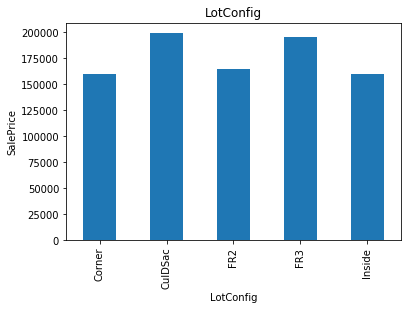

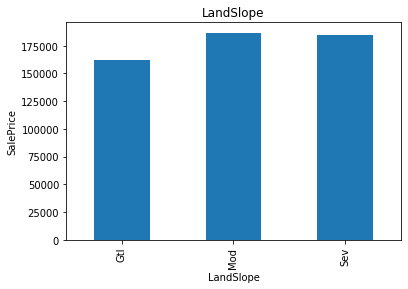

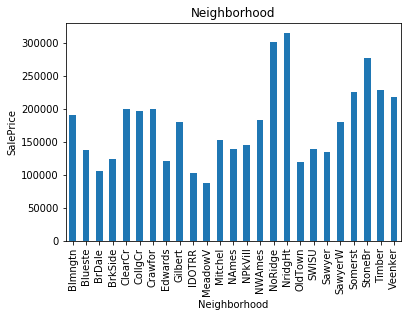

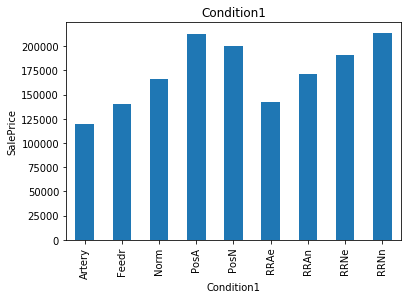

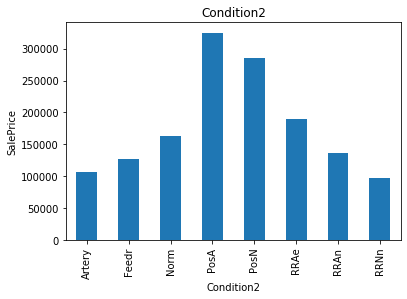

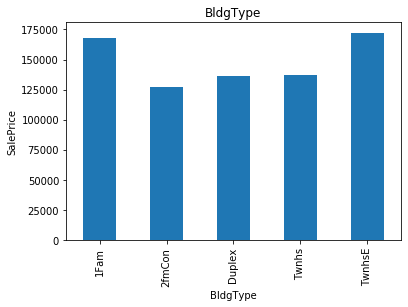

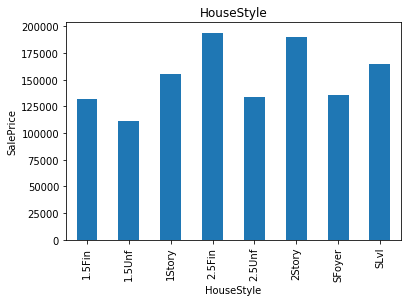

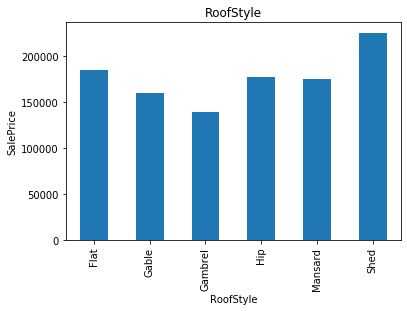

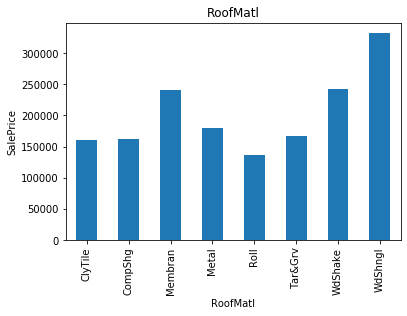

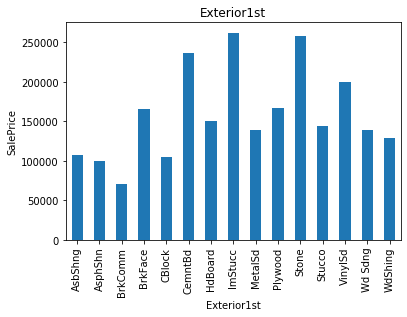

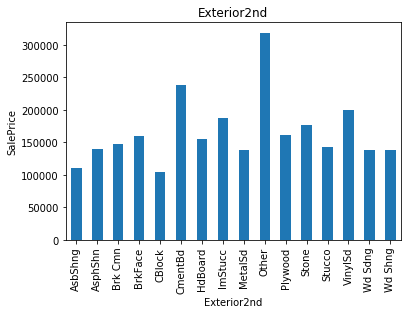

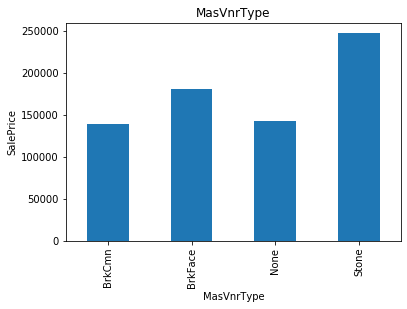

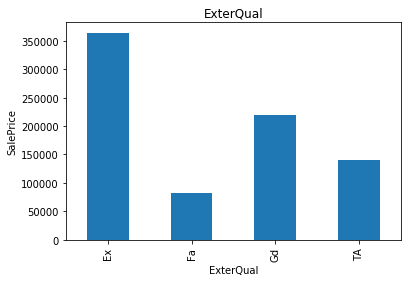

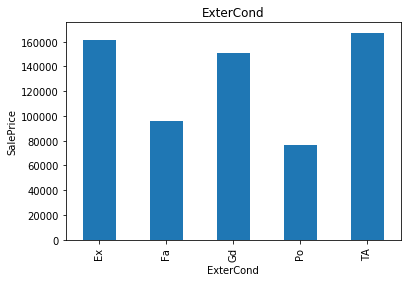

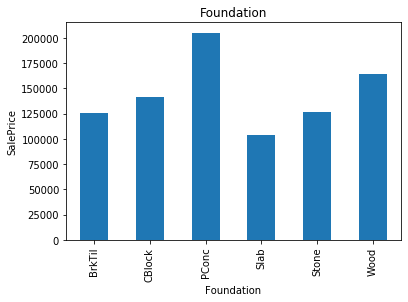

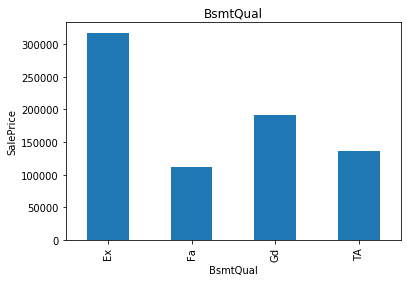

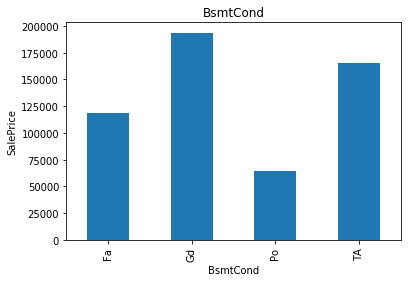

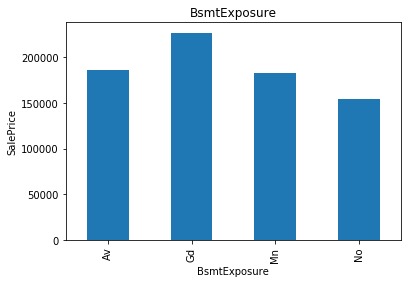

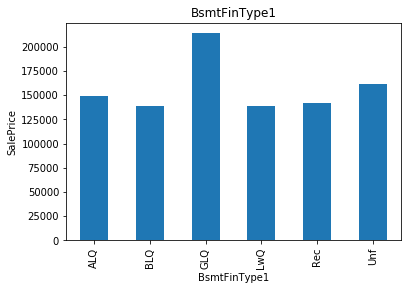

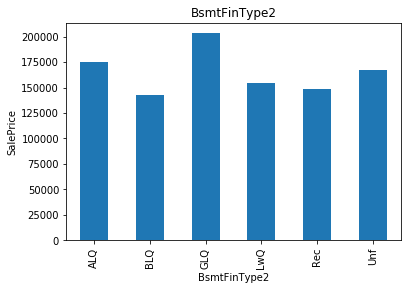

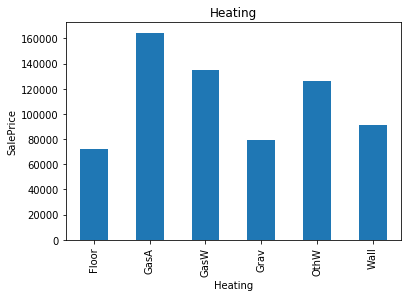

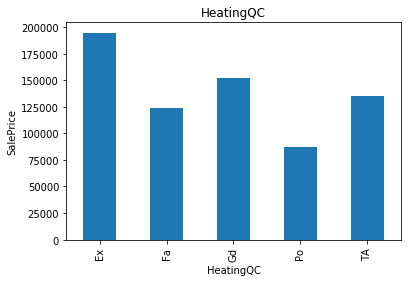

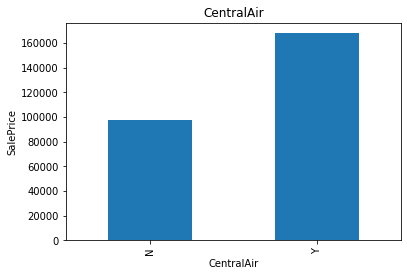

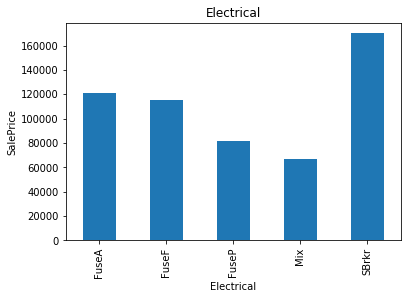

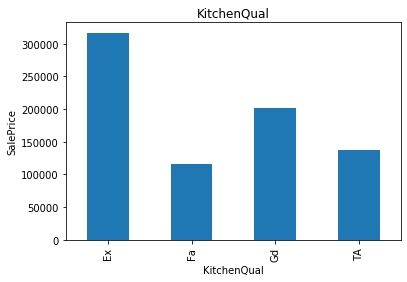

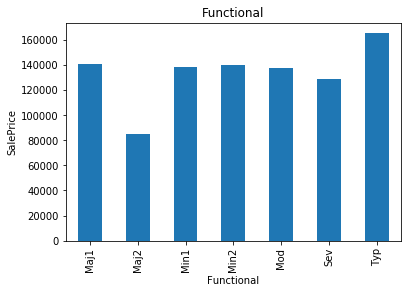

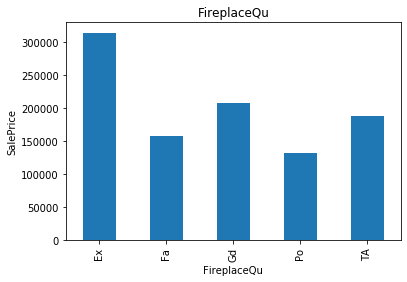

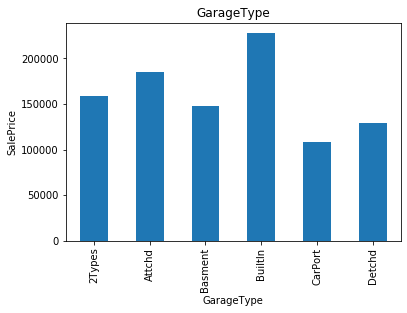

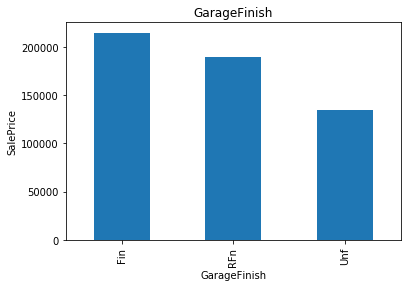

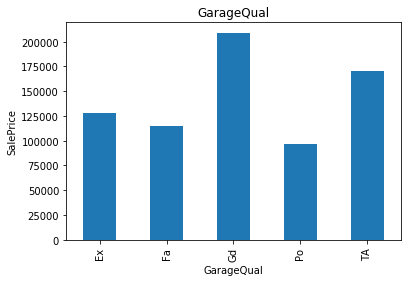

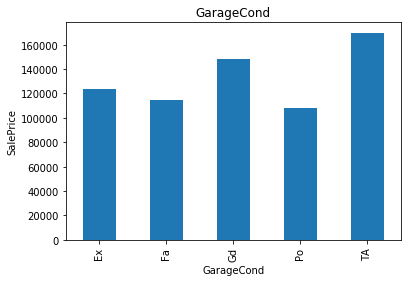

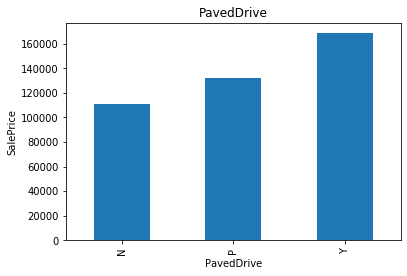

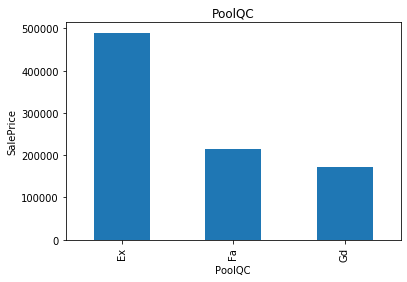

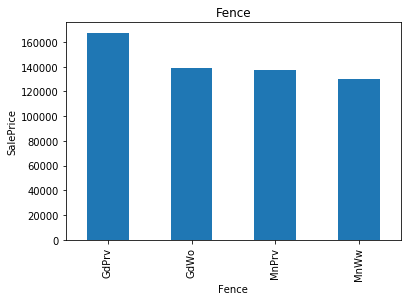

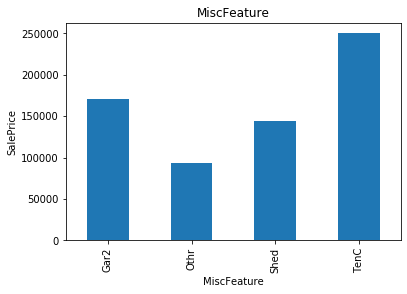

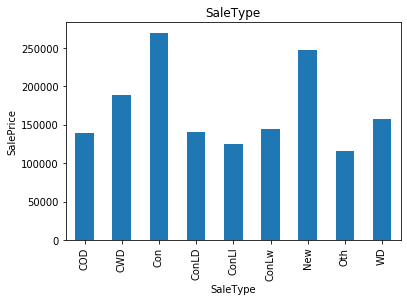

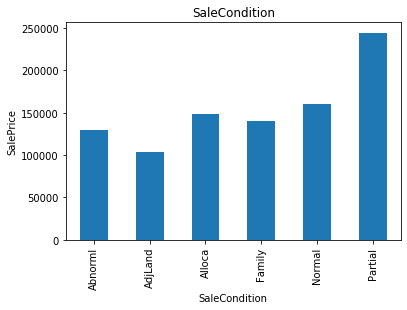

In [19]:
def analyze_cat_relation_with_target(df, var):
    df = df.copy()
    df.groupby(var)['SalePrice'].median().plot.bar()
    plt.xlabel(var)
    plt.ylabel('SalePrice')
    plt.title(var)
    plt.show()

for var in cat_vars:
    analyze_cat_relation_with_target(train, var)

A few of categorical variables can be a good candidates for predictors of Sale Price, as the average Sale Price between categories strongly differs.
Good examples are: MSZoning, Neighborhood, Exterior1st, Exterior2nd, ExterQual, BsmtQual, BsmtCond. 

## Correlation with SalePrice

Below is the list of most correlated variables with Sale Price:

In [20]:
corr = train.corr()
corr["SalePrice"].sort_values(ascending=False)

SalePrice           1.000000
OverallQual         0.790982
GrLivAndBsmtArea    0.778959
GrLivArea           0.708624
GarageCars          0.640409
GarageArea          0.623431
TotalBsmtSF         0.613581
1stFlrSF            0.605852
FullBath            0.560664
TotRmsAbvGrd        0.533723
YearBuilt           0.522897
YearRemodAdd        0.507101
GarageYrBlt         0.486362
MasVnrArea          0.477493
Fireplaces          0.466929
BsmtFinSF1          0.386420
LotFrontage         0.351799
WoodDeckSF          0.324413
2ndFlrSF            0.319334
OpenPorchSF         0.315856
HalfBath            0.284108
LotArea             0.263843
BsmtFullBath        0.227122
BsmtUnfSF           0.214479
BedroomAbvGr        0.168213
ScreenPorch         0.111447
PoolArea            0.092404
MoSold              0.046432
3SsnPorch           0.044584
BsmtFinSF2         -0.011378
BsmtHalfBath       -0.016844
MiscVal            -0.021190
LowQualFinSF       -0.025606
YrSold             -0.028923
OverallCond   